# Crop Production In india 

In [1]:
##Importing important libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
##Import Data
df=pd.read_csv("crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.shape      

(246091, 7)

#There are 246091 rows and 7 Columns of attribute.

In [4]:
 df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


#There is 7 attributes, in which four (state_Name,District_Name,Season,Crop) are categorical and three are numerical attributes.

In [5]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
df.State_Name.nunique() 

33

 ##Total number of state is 33 including union territory

In [7]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [8]:
df.Season.unique() ##Total no of season 

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

##There are trailing white spaces in some entries

In [9]:
df.Crop.nunique()

124

In [10]:
# To remove white space at the end of strings
df["Season"] = df["Season"].str.rstrip()
df["State_Name"] = df["State_Name"].str.rstrip()
df["Crop"] = df["Crop"].str.rstrip() 
df["District_Name"] = df["District_Name"].str.rstrip() 
df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [11]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.unique())

19
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]


#The Data has been collected from the year 1997 to 2015 (19 yrs)

In [12]:
df.District_Name.nunique() ## No. of districts 

646

In [13]:
df.isnull().sum()    ##Checking for missing values ,there is 3730 vaues in production are missing.

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [14]:
df['Production'] = df['Production'].replace(0, np.nan)
df['Production']=df['Production'].fillna(df.groupby('Crop')['Production'].transform('mean'))

In [15]:
df.isnull().sum() 

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       663
dtype: int64

In [16]:
Crop_Prod = df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
Crop_Prod.tail(20) 

,Crop,Production
115,Turnip,484.0
121,other fibres,0.0
120,Yam,0.0
118,Water Melon,0.0
11,Beet Root,0.0
12,Ber,0.0
4,Ash Gourd,0.0
84,Plums,0.0
104,Snak Guard,0.0
94,Ribed Guard,0.0


In [17]:
##the percentage of missing values is very less compare to whole data so we can drop the missing values rows
df.dropna(subset=["Production"],axis=0,inplace=True) 

In [18]:
df.isnull().sum() 
## now there is  no missing values after dropping the missing values rows.

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [19]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245428 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     245428 non-null  object 
 1   District_Name  245428 non-null  object 
 2   Crop_Year      245428 non-null  int64  
 3   Season         245428 non-null  object 
 4   Crop           245428 non-null  object 
 5   Area           245428 non-null  float64
 6   Production     245428 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


 #rows reduced to 238838 after dropping.

In [20]:
df.District_Name.value_counts() 
# shows the no. of data from each districts

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

# Add Rainfall Data

In [21]:
# import rainfall data
raindata=pd.read_csv("rainfall in india.csv")
raindata.head()

,STATE,YEAR,ANNUAL RAINFALL
0,ARUNACHAL PRADESH,1997,2274.9
1,ARUNACHAL PRADESH,1998,3616.7
2,ARUNACHAL PRADESH,1999,2316.6
3,ARUNACHAL PRADESH,2000,2596.8
4,ARUNACHAL PRADESH,2001,2036.0


In [22]:
raindata["YEAR"].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [23]:
raindata.isnull().sum()

STATE              0
YEAR               0
ANNUAL RAINFALL    0
dtype: int64

In [24]:
raindata.rename(columns={"STATE":"State_Name","YEAR":"Crop_Year","ANNUAL RAINFALL":"Rainfall"},inplace = True)

In [25]:
print(raindata.State_Name.unique())
print(df.State_Name.unique())

['ARUNACHAL PRADESH' 'ORISSA' 'JHARKHAND' 'BIHAR' 'UTTARAKHAND' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'CHHATTISGARH' 'TELANGANA'
 'TAMIL NADU' 'KERALA' 'LAKSHADWEEP' 'ANDAMAN & NICOBAR ISLANDS' 'ASSAM'
 'MEGHALAYA' 'HARYANA ' 'CHANDIGARH' 'NAGALAND' 'MANIPUR' 'MIZORAM '
 'TRIPURA' 'PUDUCHERRY' 'UTTAR PRADESH' 'RAJASTHAN' 'MADHYAPRADESH'
 'SIKKIM' 'GUJARAT' 'GOA' 'ANDHRA PRADESH' 'KARNATAKA' 'WEST BENGAL'
 'MAHARASHTRA' 'DADRA NAGAR HAVELI']
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [26]:
raindata["State_Name"].replace({'ARUNACHAL PRADESH':'Arunachal Pradesh',
                    'ORISSA':'Odisha', 'JHARKHAND': 'Jharkhand','BIHAR':'Bihar',
                    'UTTARAKHAND':'Uttarakhand',  'PUNJAB':'Punjab','HIMACHAL PRADESH':'Himachal Pradesh',
                    'JAMMU & KASHMIR':'Jammu and Kashmir', 'CHHATTISGARH':'Chhattisgarh', 'TELANGANA':'Telangana',
                    'TAMIL NADU':"Tamil Nadu", 'KERALA':'Kerala','ANDAMAN & NICOBAR ISLANDS': 'Andaman and Nicobar Islands',
                    'ASSAM':'Assam','MEGHALAYA':'Meghalaya', 'HARYANA ':'Haryana', 'CHANDIGARH':'Chandigarh',
                    'NAGALAND':'Nagaland', 'MANIPUR':'Manipur', 'MIZORAM ':'Mizoram', 'TRIPURA':'Tripura', 
                    'PUDUCHERRY':'Puducherry', 'UTTAR PRADESH': 'Uttar Pradesh', 'RAJASTHAN':'Rajasthan',
                    'MADHYAPRADESH':'Madhya Pradesh','SIKKIM':'Sikkim', 'GUJARAT':'Gujarat', 'GOA': 'Goa',
                    'ANDHRA PRADESH':'Andhra Pradesh', 'KARNATAKA':'Karnataka', 'WEST BENGAL':'West Bengal',
                    'MAHARASHTRA':'Maharashtra','DADRA NAGAR HAVELI':'Dadra and Nagar Haveli'}, inplace=True)
raindata.State_Name.unique()

array(['Arunachal Pradesh', 'Odisha', 'Jharkhand', 'Bihar', 'Uttarakhand',
       'Punjab', 'Himachal Pradesh', 'Jammu and Kashmir', 'Chhattisgarh',
       'Telangana', 'Tamil Nadu', 'Kerala', 'LAKSHADWEEP',
       'Andaman and Nicobar Islands', 'Assam', 'Meghalaya', 'Haryana',
       'Chandigarh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura',
       'Puducherry', 'Uttar Pradesh', 'Rajasthan', 'Madhya Pradesh',
       'Sikkim', 'Gujarat', 'Goa', 'Andhra Pradesh', 'Karnataka',
       'West Bengal', 'Maharashtra', 'Dadra and Nagar Haveli'],
      dtype=object)

In [27]:
set(raindata.State_Name)==set(df.State_Name)

False

In [28]:
raindata=raindata[raindata.State_Name!="LAKSHADWEEP"]

In [29]:
set(raindata.State_Name)==set(df.State_Name)

True

In [30]:
raindata.tail(10)

,State_Name,Crop_Year,Rainfall
636,Dadra and Nagar Haveli,2006,1089.90
637,Dadra and Nagar Haveli,2007,1034.80
638,Dadra and Nagar Haveli,2008,759.50
639,Dadra and Nagar Haveli,2009,619.25
640,Dadra and Nagar Haveli,2010,1104.30
641,Dadra and Nagar Haveli,2011,816.50
642,Dadra and Nagar Haveli,2012,518.90
643,Dadra and Nagar Haveli,2013,900.20
644,Dadra and Nagar Haveli,2014,544.80
645,Dadra and Nagar Haveli,2015,532.30


In [31]:
df = pd.merge(df, raindata)

In [32]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Rainfall
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2763.2
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2763.2
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2763.2
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2763.2
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2763.2


In [33]:
df=df[["State_Name","District_Name","Crop_Year","Season","Area","Rainfall","Crop","Production"]]
df.head()

,State_Name,District_Name,Crop_Year,Season,Area,Rainfall,Crop,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,1254.0,2763.2,Arecanut,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2.0,2763.2,Other Kharif pulses,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,102.0,2763.2,Rice,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,176.0,2763.2,Banana,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,720.0,2763.2,Cashewnut,165.0


In [34]:
df.describe()

,Crop_Year,Area,Rainfall,Production
count,245428.000000,2.454280e+05,245428.000000,2.454280e+05
mean,2005.649588,1.203498e+04,1270.235522,5.833894e+05
std,4.955392,5.058780e+04,638.338616,1.697353e+07
min,1997.000000,4.000000e-02,188.850000,1.000000e-02
25%,2002.000000,8.200000e+01,807.650000,1.000000e+02
50%,2006.000000,5.890000e+02,1144.000000,8.540000e+02
75%,2010.000000,4.410000e+03,1686.466667,7.492250e+03
max,2015.000000,8.580100e+06,3825.200000,1.250800e+09


<AxesSubplot:>

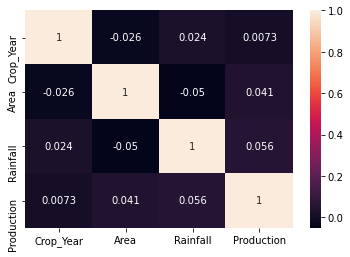

In [35]:
sns.heatmap(df.corr(),annot=True)

# State

In [36]:
df.State_Name.value_counts().head(15)  

Uttar Pradesh     33306
Madhya Pradesh    22904
Karnataka         21122
Bihar             18885
Assam             14628
Odisha            13575
Tamil Nadu        13086
Maharashtra       12628
Rajasthan         12478
Chhattisgarh      10709
West Bengal        9613
Andhra Pradesh     9599
Gujarat            8436
Haryana            5875
Telangana          5621
Name: State_Name, dtype: int64

#This shows that we have more data from rich agriculture state like UP,MP etc..

In [37]:
state_prod = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

<AxesSubplot:xlabel='Production', ylabel='State_Name'>

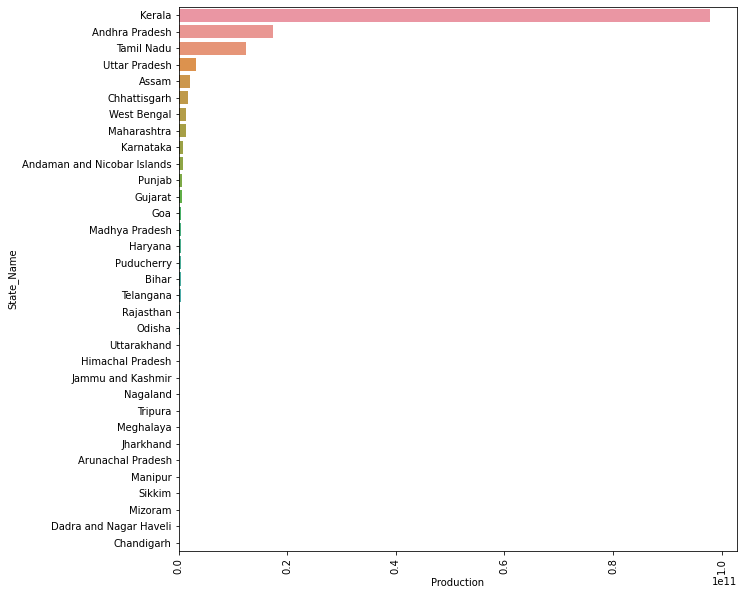

In [38]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data=state_prod, y= "State_Name",x="Production")

In [39]:
state_prod.head(5) # Top 5 states with most production over the years

,State_Name,Production
15,Kerala,9.790763e+10
1,Andhra Pradesh,1.732612e+10
27,Tamil Nadu,1.235086e+10
30,Uttar Pradesh,3.236034e+09
3,Assam,2.112198e+09


In [40]:
state_prod.tail(5) # Top 5 states with least production over the years

,State_Name,Production
18,Manipur,5.257139e+06
26,Sikkim,2.435735e+06
20,Mizoram,2.373936e+06
7,Dadra and Nagar Haveli,1.847871e+06
5,Chandigarh,6.923093e+04


#We can see that Kerela has the highest production, 
Also we can see that the top 3 states with highest production over the years are from South India

# Crop Year

In [41]:
print(df.Crop_Year.value_counts())  ## count of data in each year

2003    16946
2002    16391
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13636
2012    13396
2001    13361
1999    12515
1998    11533
2014    10959
1997     8899
2015      562
Name: Crop_Year, dtype: int64


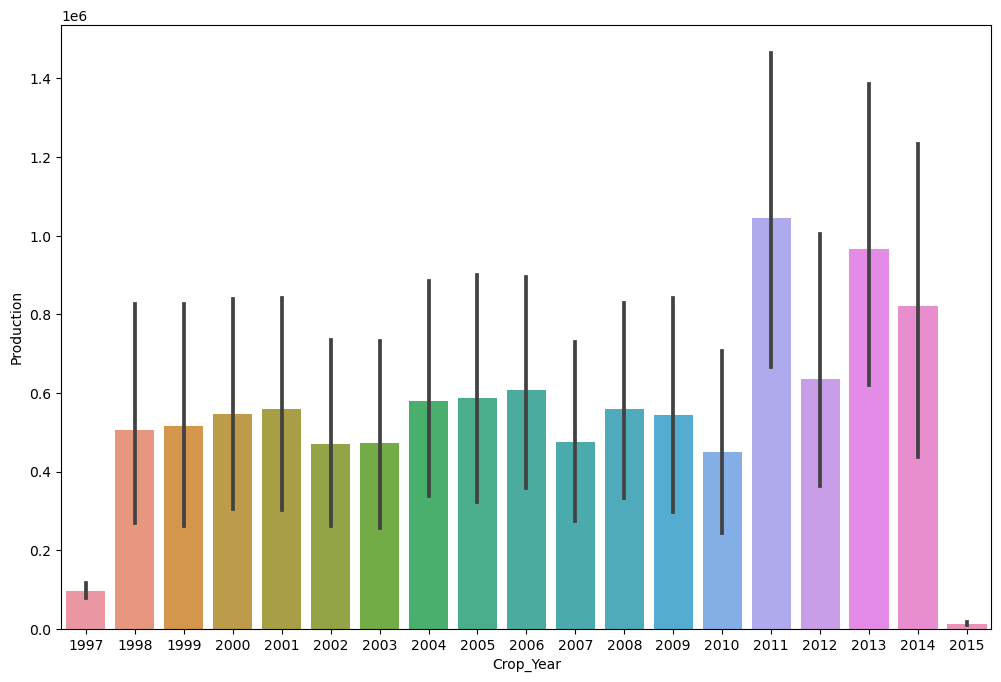

In [42]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production');

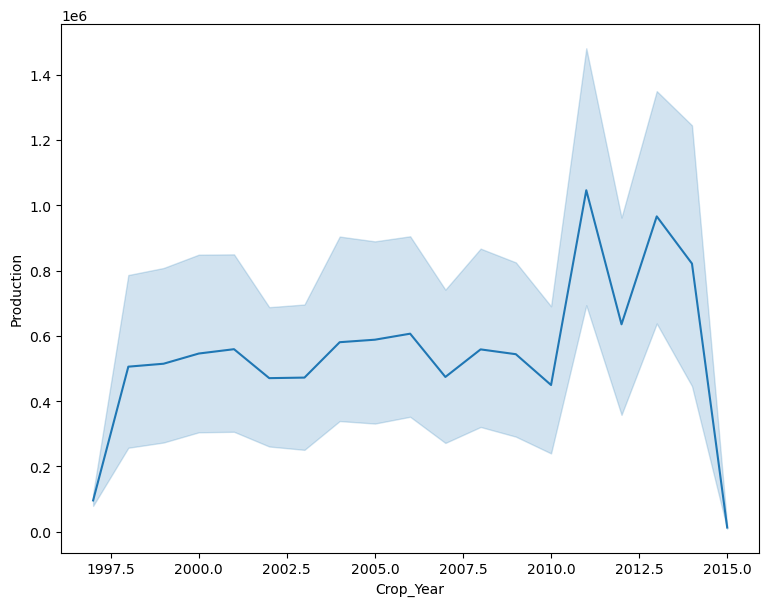

In [43]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

#the period between 2010-2012 and then 2012-2013 happens to be the year which saw highest yield for the crops.

In [44]:
#  production from each state in a year 
prod_year= df.groupby(['State_Name','Crop_Year'])['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
prod_year.head(10)  # Top states with most production in a year

,State_Name,Crop_Year,Production
226,Kerala,2005,6.330183e+09
431,Tamil Nadu,2011,6.262207e+09
227,Kerala,2006,6.058022e+09
225,Kerala,2004,6.005739e+09
235,Kerala,2014,5.955679e+09
232,Kerala,2011,5.949664e+09
234,Kerala,2013,5.928176e+09
224,Kerala,2003,5.881859e+09
229,Kerala,2008,5.809112e+09
233,Kerala,2012,5.805751e+09


In [45]:
prod_year.tail(10)

,State_Name,Crop_Year,Production
84,Chandigarh,2002,5930.0
85,Chandigarh,2003,4605.0
87,Chandigarh,2005,3485.0
86,Chandigarh,2004,3455.0
88,Chandigarh,2006,3318.0
89,Chandigarh,2007,3295.0
90,Chandigarh,2008,3195.0
92,Chandigarh,2010,3109.0
91,Chandigarh,2009,3095.0
271,Manipur,1997,412.0


# Season

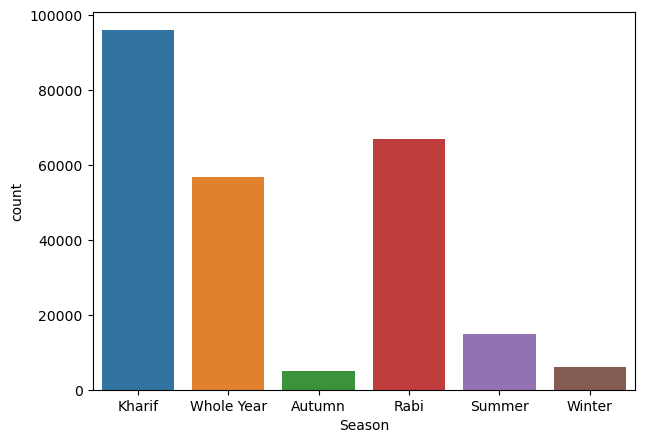

In [46]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');

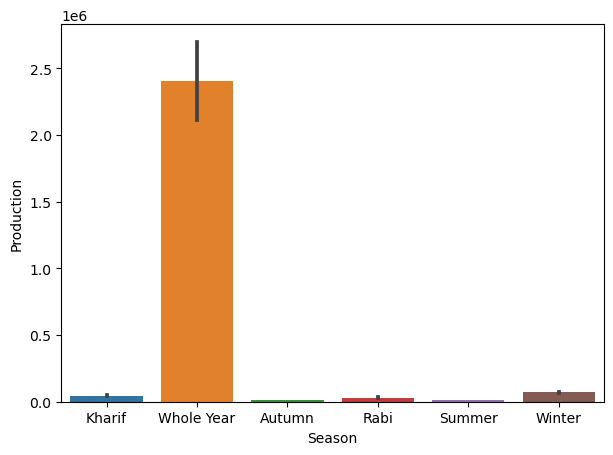

In [47]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

#Whole Year season seems to have yeilded more crops compared to other seasons

## Crops

In [48]:
print(df.Crop.value_counts().head(10))

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: Crop, dtype: int64


In [49]:
Crop_Prod = df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
Crop_Prod.head(10) 

,Crop,Production
24,Coconut,1.318414e+11
90,Sugarcane,5.611484e+09
80,Rice,1.608239e+09
102,Wheat,1.336888e+09
74,Potato,4.261174e+08
29,Cotton(lint),3.084704e+08
52,Maize,2.778036e+08
44,Jute,1.873608e+08
5,Banana,1.510760e+08
89,Soyabean,1.434901e+08


<AxesSubplot:xlabel='Production', ylabel='Crop'>

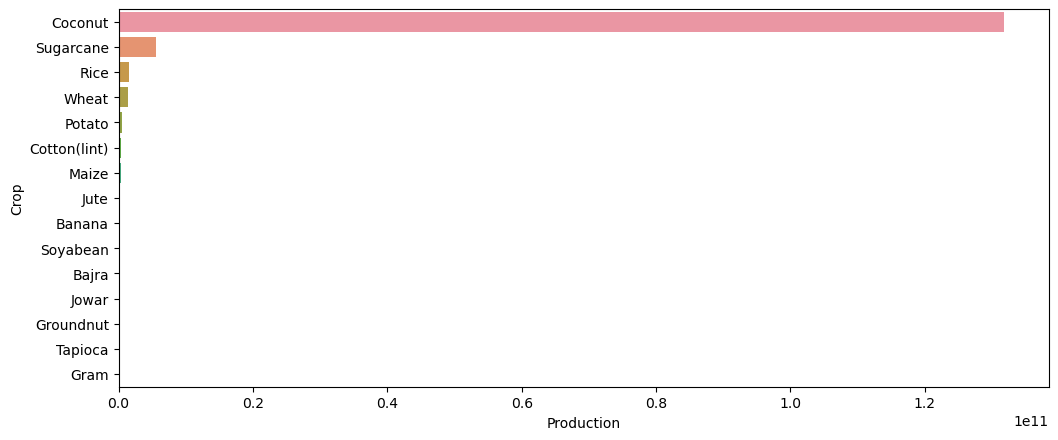

In [50]:
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(data=Crop_Prod.head(15),x='Production',y='Crop')

#From 1997 to 2015,Rice is produced more, but more yield is obtained from coconut

#Coconut, Sugarcane, Rice, Wheat and Potato happen to be the top 5 crops yeilding more productions in India over the years

In [51]:
Crop_Prod.tail(10)  # worst performing crops

,Crop,Production
46,Kapas,8542.000000
7,Bean,6240.000000
17,Carrot,5992.000000
81,Ricebean (nagadal),5230.000000
13,Bottle Gourd,4566.545455
10,Bitter Gourd,3247.600000
27,Cond-spcs other,2260.400000
70,Perilla,1410.000000
42,Jobster,1180.000000
99,Turnip,484.000000


# Analyze the highest produced crops in the country

# 1. Coconut

In [52]:
coconut_df = df[df['Crop'] == 'Coconut']

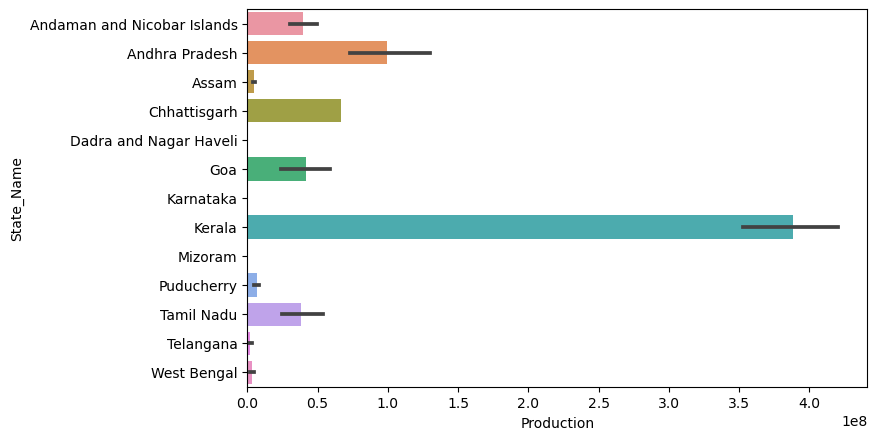

In [53]:
# Average Coconut production in states
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(data=coconut_df,x='Production',y='State_Name');

In [54]:
coconut_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()

,State_Name,Production
0,Kerala,9.780304e+10
1,Andhra Pradesh,1.680600e+10
2,Tamil Nadu,1.120342e+10
3,Assam,1.954408e+09
4,Chhattisgarh,1.594052e+09


#Kerala followed by Andra Pradesh and Andaman & Nicobar islands has highest production of coconut in India

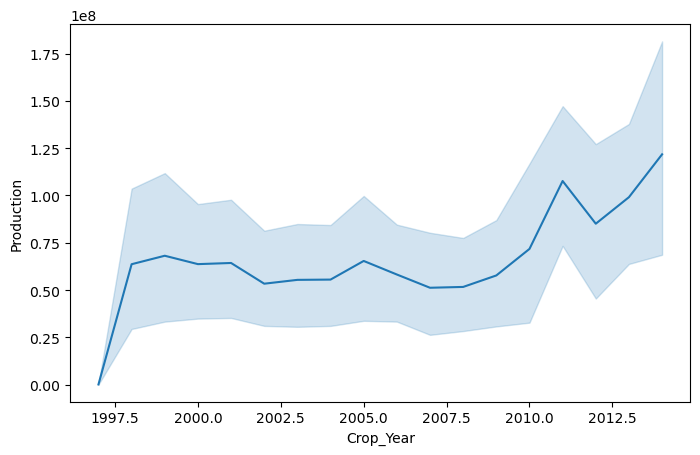

In [55]:
# Coconut Production vs Year
plt.figure(figsize=(8,5),dpi=100)
sns.lineplot(data=coconut_df,x='Crop_Year',y='Production');

#We can see that, coconut production is increasing over years

In [56]:
# cocnut production vs Season
coconut_df.groupby('Season')['Production'].sum().nlargest()

Season
Whole Year    1.315756e+11
Kharif        2.658019e+08
Name: Production, dtype: float64

<AxesSubplot:>

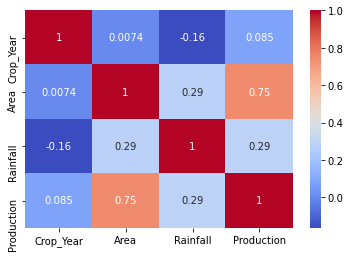

In [57]:
sns.heatmap(coconut_df.corr(),annot=True,cmap = "coolwarm" )

#Whole Year season has the highest yield of Cococnut crops

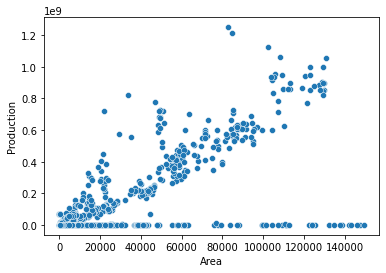

In [58]:
sns.scatterplot(data=coconut_df,x='Area',y='Production');

<AxesSubplot:xlabel='District_Name', ylabel='Production'>

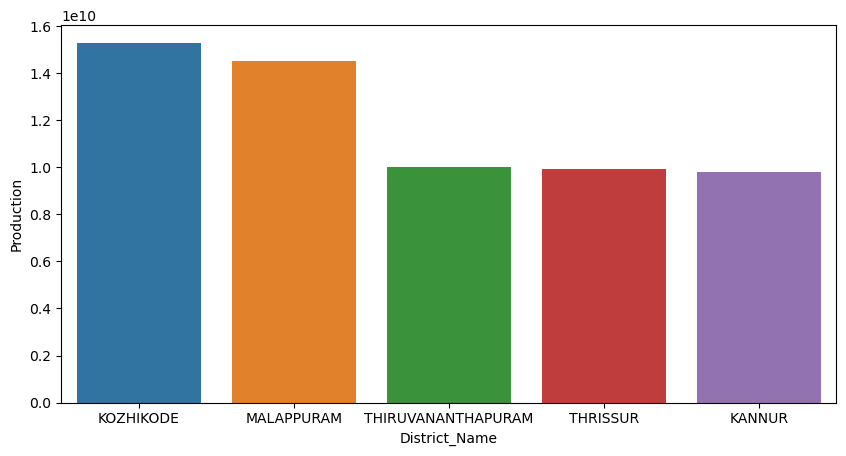

In [59]:
# coconut production in districts 
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(data=coconut_df.groupby('District_Name').sum()['Production'].nlargest().reset_index(),x='District_Name',y='Production')

# 2. Sugar cane

In [60]:
sugar_df = df[df['Crop'] == 'Sugarcane']

<AxesSubplot:xlabel='Production', ylabel='State_Name'>

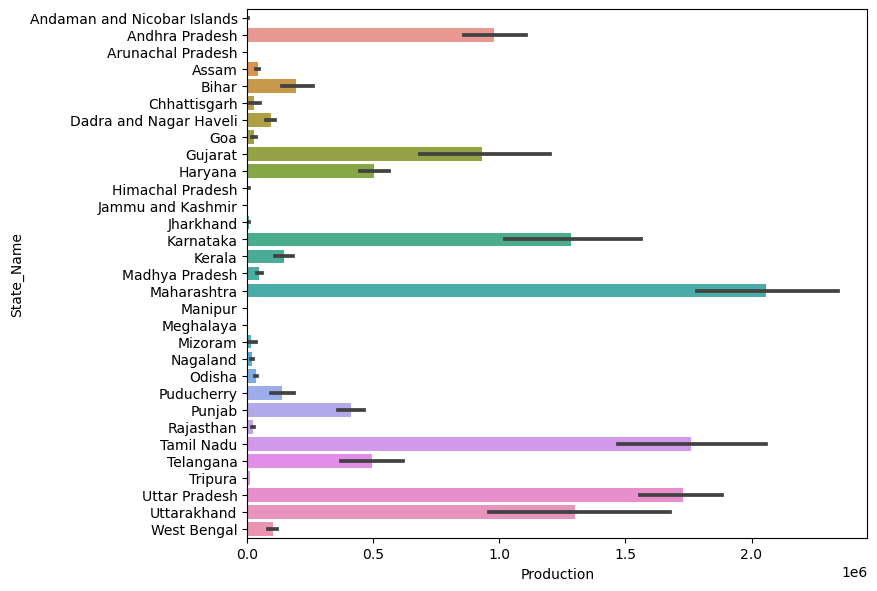

In [61]:
# Average Sugar cane production in states
plt.figure(figsize=(8,7),dpi=100)
sns.barplot(data=sugar_df,x='Production',y='State_Name')

In [62]:
sugar_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()

,State_Name,Production
0,Uttar Pradesh,2.202875e+09
1,Maharashtra,9.384860e+08
2,Tamil Nadu,8.489137e+08
3,Karnataka,5.158455e+08
4,Andhra Pradesh,2.267303e+08


#UP, Maharashtra, Tamil Nadu, Karnataka and Andra Pradesh have the highest production of Sugarcane

<AxesSubplot:xlabel='District_Name', ylabel='Production'>

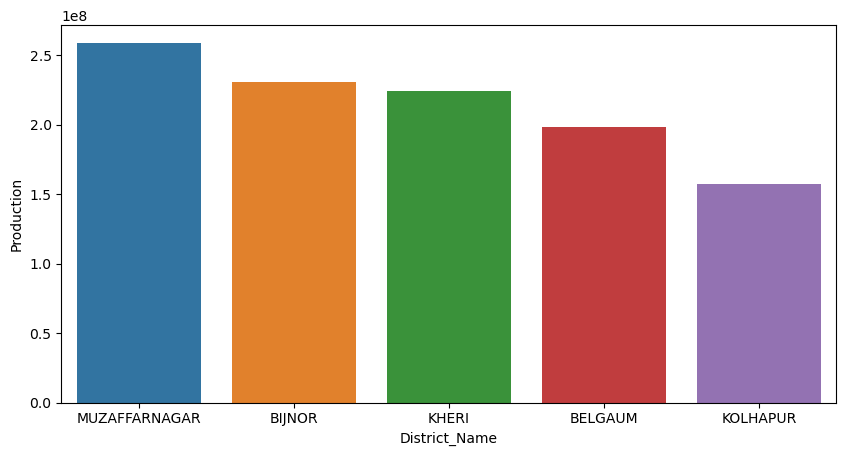

In [63]:
# Sugarcane production in districts 
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(data=sugar_df.groupby('District_Name').sum()['Production'].nlargest().reset_index(),x='District_Name',y='Production')

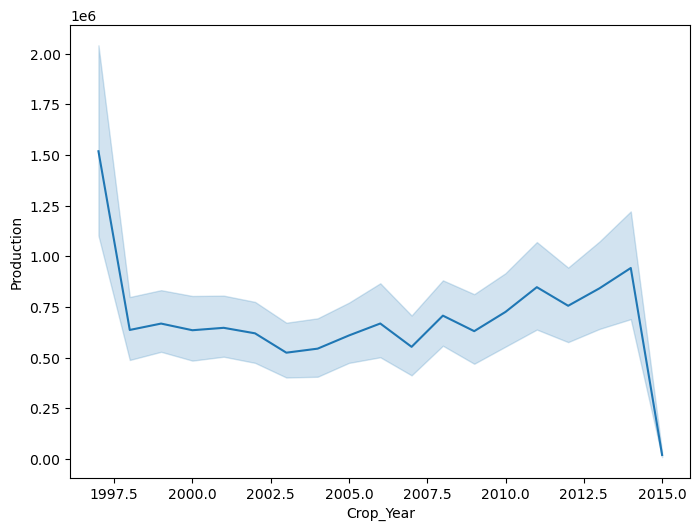

In [64]:
plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=sugar_df,x='Crop_Year',y='Production');

#Production of sugarcane decreased drastically during 1998, and then it was stable till 2014

<AxesSubplot:xlabel='Season', ylabel='Production'>

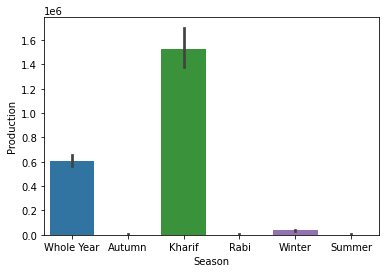

In [66]:
sns.barplot(data=sugar_df,x='Season',y='Production')

<AxesSubplot:>

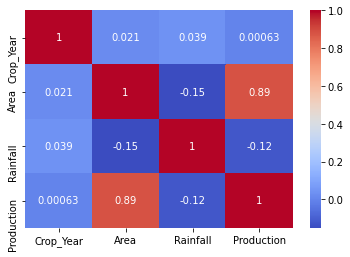

In [67]:
sns.heatmap(sugar_df.corr(),annot=True,cmap = "coolwarm" )

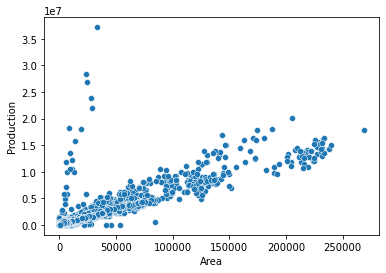

In [68]:
sns.scatterplot(data=sugar_df,x='Area',y='Production');

# 3. Rice

In [69]:
rice_df = df[df['Crop'] == 'Rice']

In [70]:
rice_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()

,State_Name,Production
0,West Bengal,2.580928e+08
1,Uttar Pradesh,2.187934e+08
2,Punjab,1.797020e+08
3,Andhra Pradesh,1.437425e+08
4,Odisha,1.199551e+08


<AxesSubplot:xlabel='Production', ylabel='State_Name'>

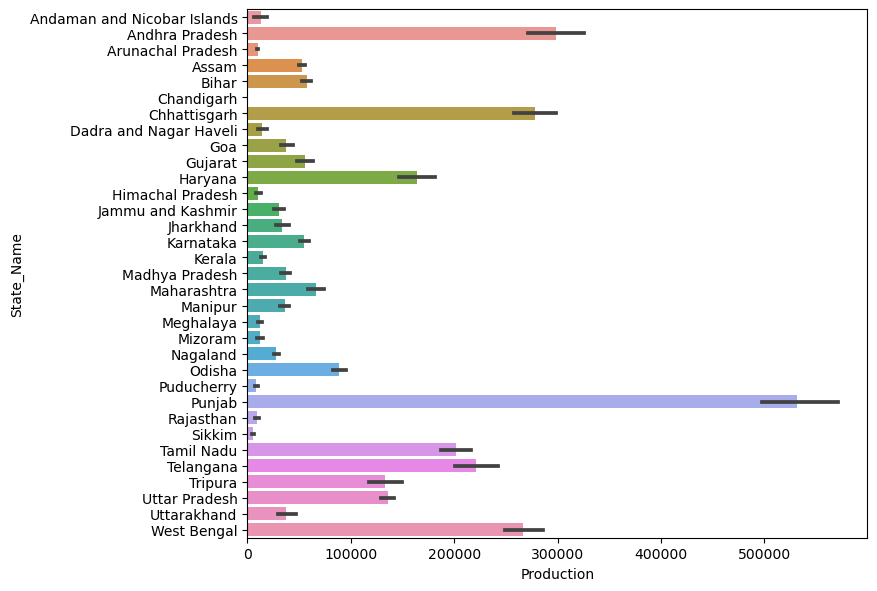

In [71]:
# Average Rice production in states
plt.figure(figsize=(8,7),dpi=100)
sns.barplot(data=rice_df,x='Production',y='State_Name')

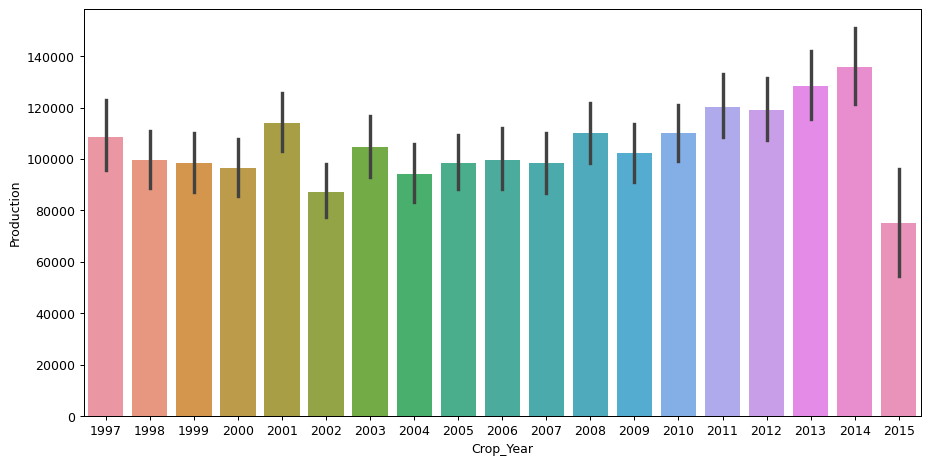

In [72]:
plt.figure(figsize=(12,6),dpi=90)
sns.barplot(data=rice_df,x='Crop_Year',y='Production');

<AxesSubplot:xlabel='Season', ylabel='Production'>

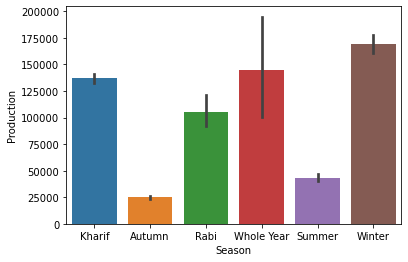

In [73]:
sns.barplot(data=rice_df,x='Season',y='Production')

<AxesSubplot:>

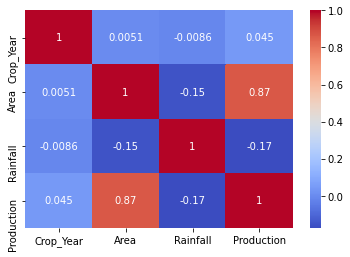

In [74]:
sns.heatmap(rice_df.corr(),annot=True,cmap = "coolwarm" )

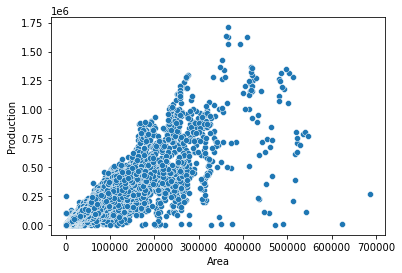

In [75]:
sns.scatterplot(data=rice_df,x='Area',y='Production');

# Zone-Wise Production - 1997-2014

In [76]:

north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [77]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [78]:
df.Zones.value_counts()

South Zone      53619
North Zone      51468
East Zone       43339
West Zone       33750
Central Zone    33613
NE Zone         28297
Union Terr       1342
Name: Zones, dtype: int64

Text(0.5, 1.0, 'Zone-Wise Production: Total')

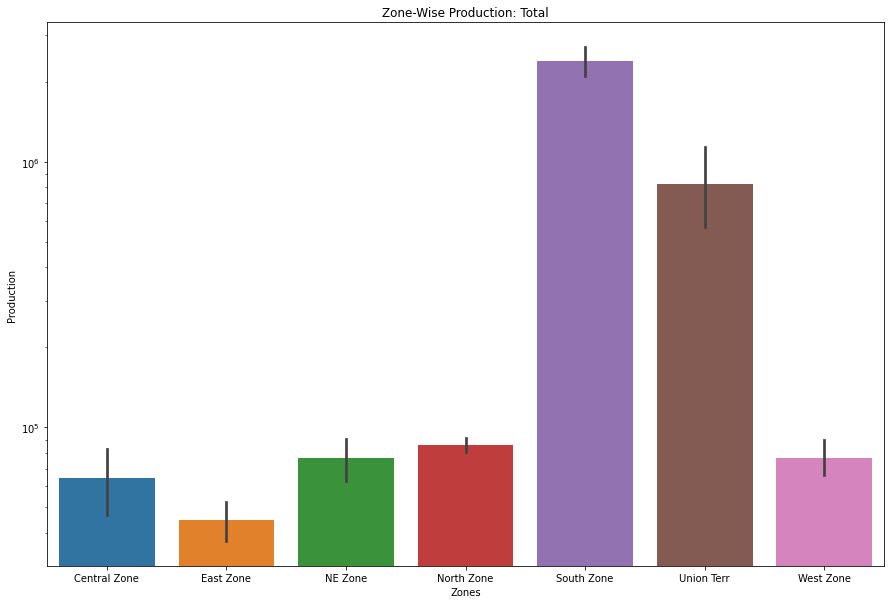

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=df.Zones.sort_values(ascending=True), y=df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

# Different categories of Crops

In [80]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [81]:
df["cat_crop"].value_counts()

Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    22967
spices        21986
Nuts          11588
Commercial    10716
fibres        10185
Beans          9307
Fruits         8037
Name: cat_crop, dtype: int64

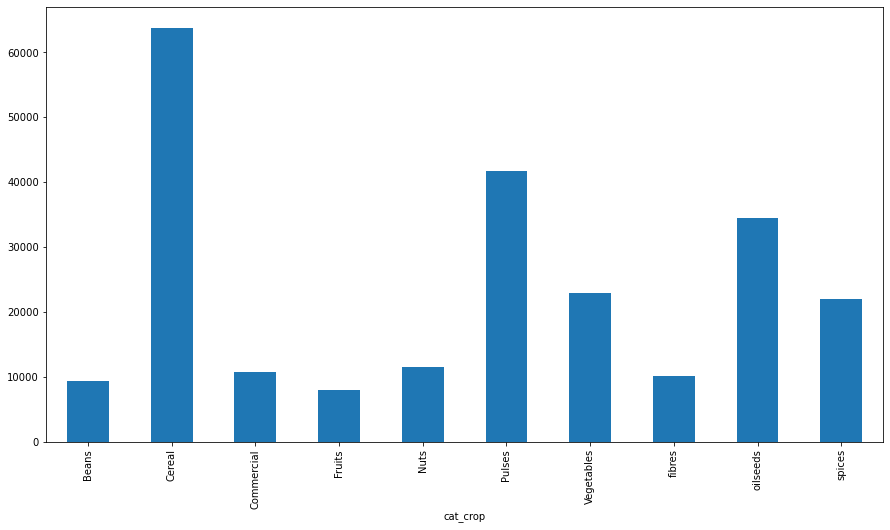

In [82]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
df.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

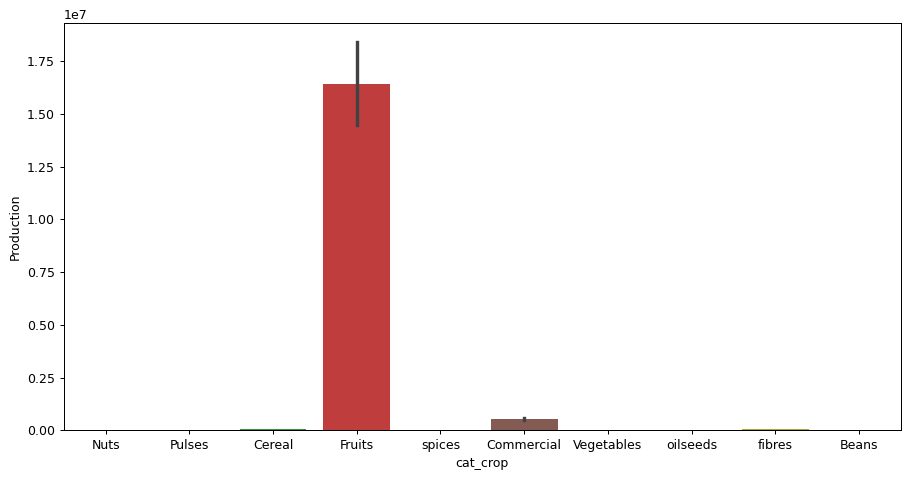

In [83]:
plt.figure(figsize=(12,6),dpi=90)
sns.barplot(data=df,x='cat_crop',y='Production');

In [84]:
cultivation_data = df[["State_Name","District_Name","Crop_Year","Season","Rainfall","Crop","Area","Production"]]
cultivation_data.head()

,State_Name,District_Name,Crop_Year,Season,Rainfall,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2763.2,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2763.2,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2763.2,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,2763.2,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,2763.2,Cashewnut,720.0,165.0


# Dummy encoding

In [85]:
cultivation_data = pd.get_dummies(cultivation_data)
x = cultivation_data.drop("Production",axis=1)
y = cultivation_data[["Production"]]

# Train/Test Split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (164436, 793)
x_test : (80992, 793)
y_train : (164436, 1)
y_test : (80992, 1)


# Regression Models

In [87]:
seed = 7
Predictions=y_test.copy()
models = []
models.append(('dtr_reg', DecisionTreeRegressor(random_state=42)))
models.append(('knr_reg', KNeighborsRegressor()))
models.append(('bagging_reg', BaggingRegressor(n_estimators=10, random_state=42)))
models.append(('rf_reg', RandomForestRegressor(n_estimators=10,random_state=42)))
models.append(('grad_reg', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names=[]
RMSE=[]
for name,model in models:
    bla=model.fit(x_train, y_train)
    print(f"%s === "%model)
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold)
    for i in range (len(kf_cv_scores)):
        print(f"%s {[i]} Accuracy :  {kf_cv_scores[i]}"% model)
    
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    results.append(kf_cv_scores)
    names.append(name)
    ypred = model.predict(x_test)
    Predictions[name]=ypred
    mse = mean_squared_error(y_test,ypred)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % np.sqrt(mse))
    RMSE.append(np.sqrt(mse))
    
    msg = "%s: %f (%f)" % (model, kf_cv_scores.mean(), kf_cv_scores.std())
    print(msg)
    print("============================================")
    print("============================================")
    print("============================================")
    


DecisionTreeRegressor(random_state=42) === 
DecisionTreeRegressor(random_state=42) [0] Accuracy :  0.5860185022006028
DecisionTreeRegressor(random_state=42) [1] Accuracy :  0.5794436734910096
DecisionTreeRegressor(random_state=42) [2] Accuracy :  0.9131971928120086
DecisionTreeRegressor(random_state=42) [3] Accuracy :  0.8568274942694323
DecisionTreeRegressor(random_state=42) [4] Accuracy :  0.9100813447226233
DecisionTreeRegressor(random_state=42) [5] Accuracy :  0.9410618099660132
DecisionTreeRegressor(random_state=42) [6] Accuracy :  0.8832158819525073
DecisionTreeRegressor(random_state=42) [7] Accuracy :  0.8706327557425898
DecisionTreeRegressor(random_state=42) [8] Accuracy :  0.5698179193116277
DecisionTreeRegressor(random_state=42) [9] Accuracy :  0.8451576978838091
K-fold CV average score: 0.80
MSE: 18319686061727.92
RMSE: 4280150.24
DecisionTreeRegressor(random_state=42): 0.795545 (0.144648)
KNeighborsRegressor() === 
KNeighborsRegressor() [0] Accuracy :  0.09777412686986131
K

# Model Evaluation

In [100]:
Predictions.head()

,Production,dtr_reg,knr_reg,bagging_reg,rf_reg,grad_reg
160095,61.4,43.1,29.02,36.16,36.88,1519.128187
10748,3284.0,5504.0,65468.20,3623.20,3627.00,-10358.579555
213093,216.0,215.0,1971.20,210.80,204.40,-10362.181755
204140,112.0,107.0,94.00,95.50,93.70,-10362.181755
232624,5.0,2.0,91.40,2.60,2.40,-10358.579555


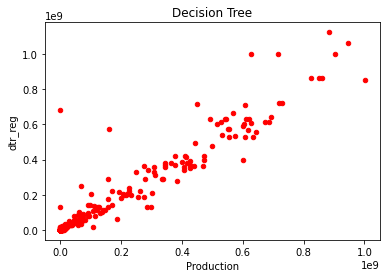

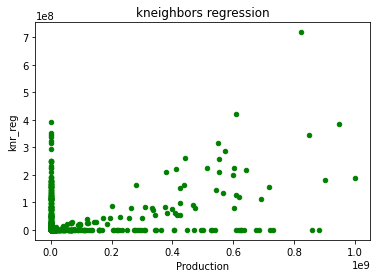

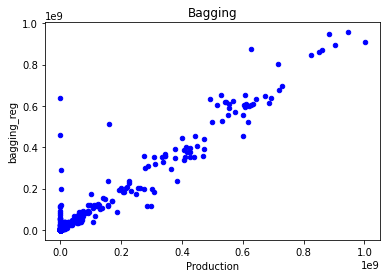

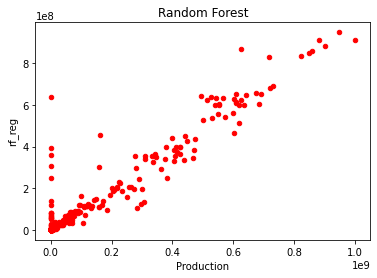

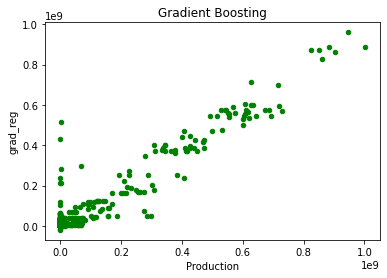

In [96]:
Predictions.plot(kind='scatter', x='Production', y='dtr_reg', color='r')
plt.title("Decision Tree")
Predictions.plot(kind='scatter', x='Production', y='knr_reg', color='g')
plt.title("kneighbors regression")
Predictions.plot(kind='scatter', x='Production', y='bagging_reg', color='b') 
plt.title("Bagging")
Predictions.plot(kind='scatter', x='Production', y='rf_reg', color='r')
plt.title("Random Forest")
Predictions.plot(kind='scatter', x='Production', y='grad_reg', color='g')
plt.title("Gradient Boosting")
plt.show()

# Cross Validation Score

In [92]:
for i in range(5):
    print(f"{models[i][0]}  : {results[i].mean()}")

dtr_reg  : 0.7955454272352223
knr_reg  : 0.14083277257455012
bagging_reg  : 0.8439550814304899
rf_reg  : 0.8362617670900013
grad_reg  : 0.9037660119476989


Gradient Boosting method has highest cross validation score, followed by Bagging regression

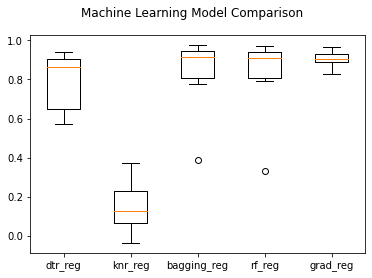

In [93]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Root mean square error

In [102]:
for name, model in models:
    MSE = np.square(np.subtract(Predictions.Production,Predictions[name])).mean()
    rmse =np.sqrt(MSE)
    print(f"{name}    : {rmse}")

dtr_reg    : 4280150.238219261
knr_reg    : 15185076.165553087
bagging_reg    : 4135598.926567064
rf_reg    : 4279872.786364577
grad_reg    : 4344597.488972486


Bagging regression have the least root mean square error, Followed by Random forest and Decision tree respectively